<a href="https://colab.research.google.com/github/abelowska/mlNeuro/blob/main/MLN_first_ml_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BCI classification model

We are going to use the open [EEG Motor Movement/Imagery Dataset](https://physionet.org/content/eegmmidb/1.0.0/S001/#files-panel) to classify **imagining the opening and closing of left or right fists**.

You can download the .zip file containing the already prepared `Epochs` of the first 10 participants here: . Each `Epochs` file consists of two types of events: *left* and *right*.

In [ ]:
!pip install mne

Imports

In [3]:
from pathlib import Path
import matplotlib.pyplot as plt
import mne
import numpy as np
import pandas as pd
from mne.datasets import eegbci

## Read data

In [ ]:
data_dir = Path('./data')
epochs_subjects = []

for idx in np.arange(1,11):
  fname = data_dir / f'subj_{idx}-epo.fif'
  epochs = mne.read_epochs(fname)
  epochs_subjects.append(epochs)

## Visualize data

In [ ]:
all_epochs = mne.concatenate_epochs(epochs_subjects)

1. Joint plot per condition

No projector specified for this dataset. Please consider the method self.add_proj.


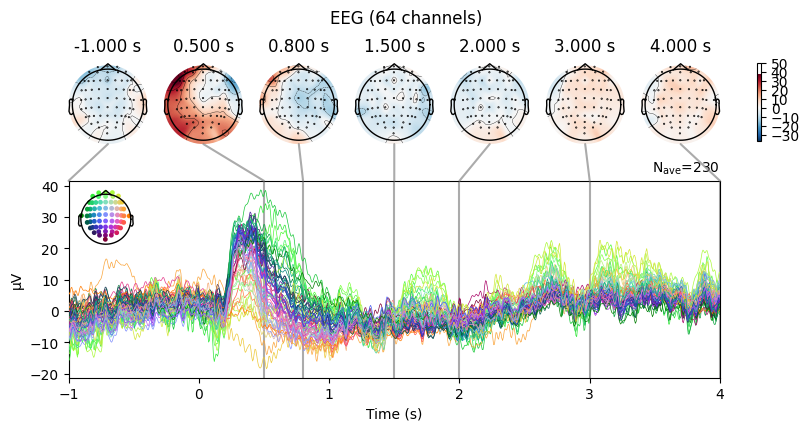

No projector specified for this dataset. Please consider the method self.add_proj.


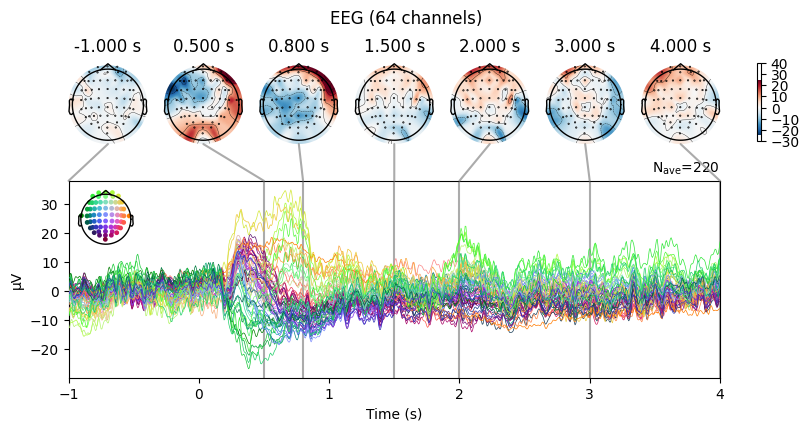

In [93]:
fig = all_epochs['left'].average().plot_joint(times=[-1, 0.5, 0.8, 1.5, 2,3,4])
fig = all_epochs['right'].average().plot_joint(times=[-1, 0.5, 0.8, 1.5, 2,3,4])

2. Single-channel plots

<Figure size 640x480 with 0 Axes>

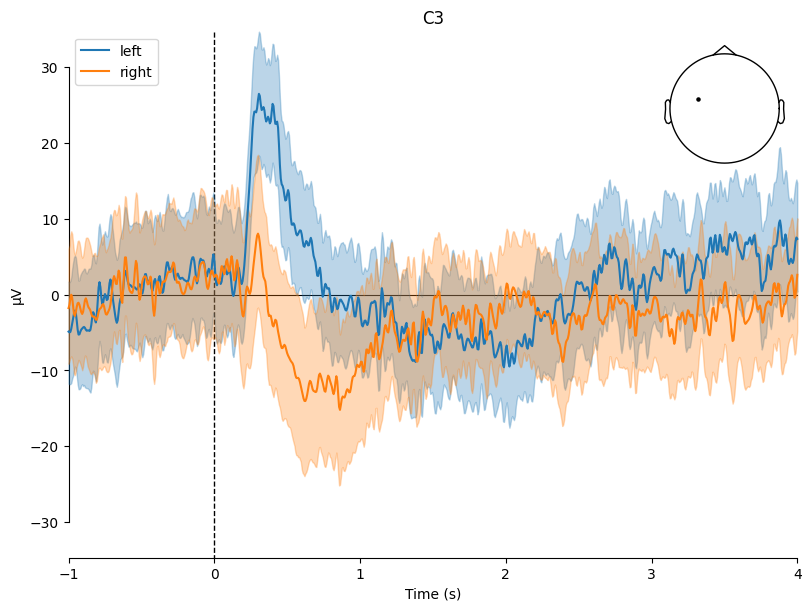

<Figure size 640x480 with 0 Axes>

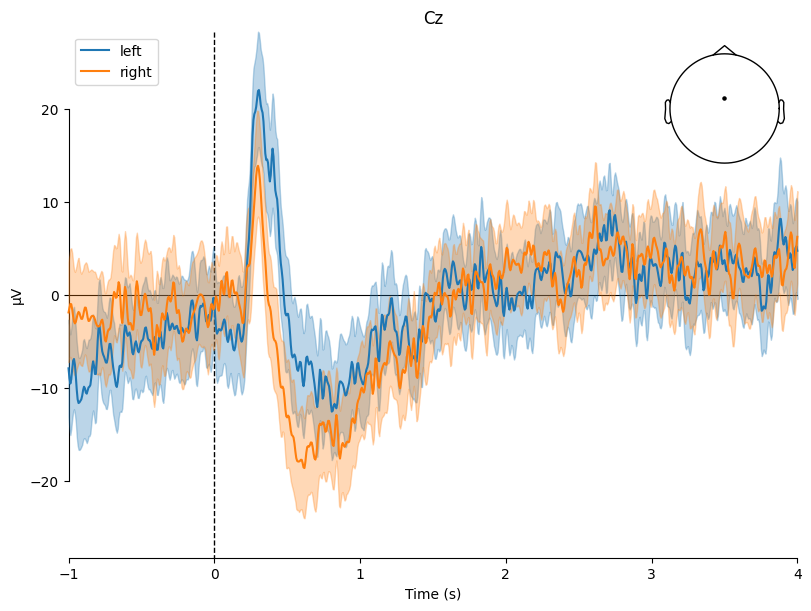

<Figure size 640x480 with 0 Axes>

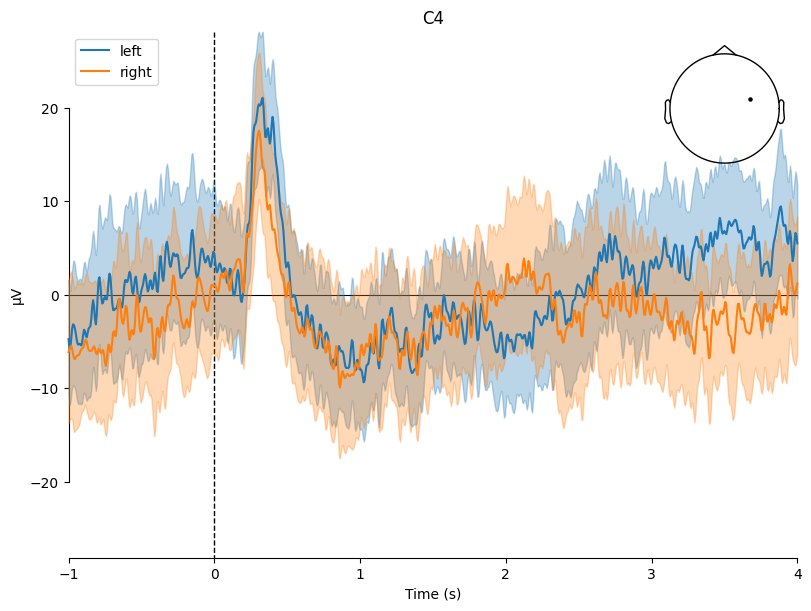

In [95]:
picks = ['C3', 'Cz', 'C4']

evokeds = dict(
    left=list(all_epochs["left"].iter_evoked()),
    right=list(all_epochs["right"].iter_evoked()),
)

for idx, pick in enumerate(picks):
  plt.figure(idx)
  fig = mne.viz.plot_compare_evokeds(evokeds, picks=pick)
  plt.show()

3. Compare spectral representation (PSD) of conditions:

In [101]:
fmin = 1
fmax = 30

spectrum_left = all_epochs["left"].compute_psd(fmin=fmin, fmax=fmax)
spectrum_right = all_epochs["right"].compute_psd(fmin=fmin, fmax=fmax)

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


Averaging across epochs...
Averaging across epochs...


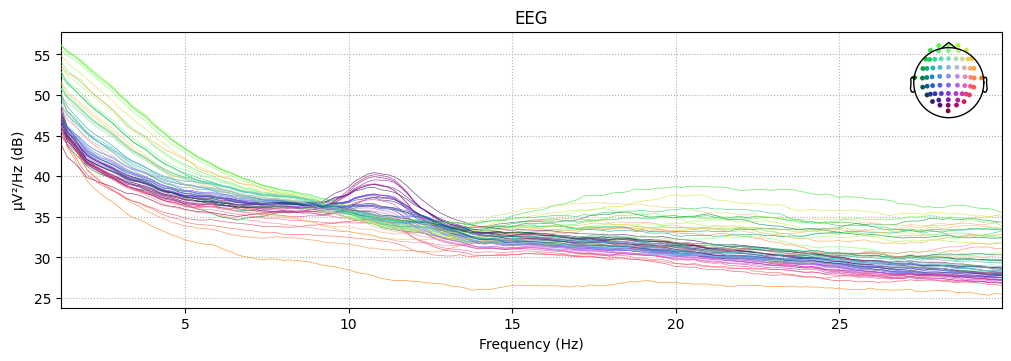

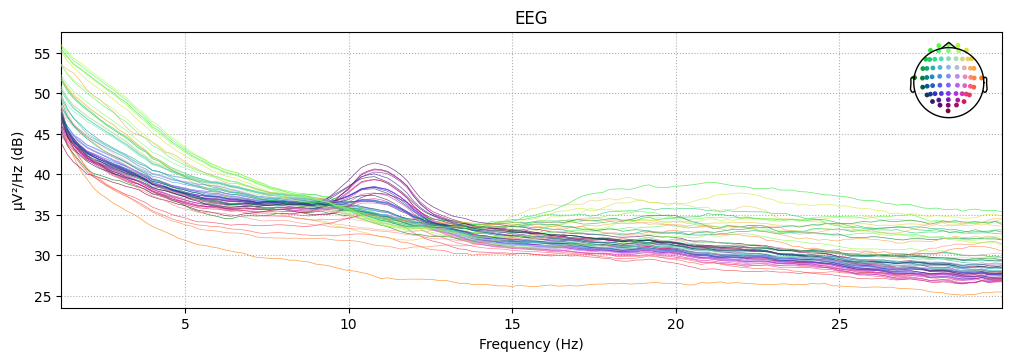

In [102]:
fig = spectrum_left.plot(picks="eeg", exclude="bads")
fig = spectrum_right.plot(picks="eeg", exclude="bads")

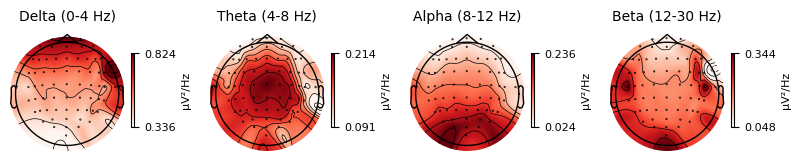

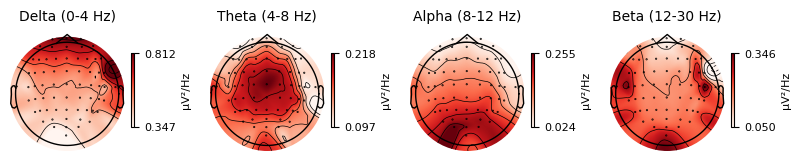

In [110]:
bands = {
    'Delta (0-4 Hz)': (0, 4),
    'Theta (4-8 Hz)': (4, 8),
    'Alpha (8-12 Hz)': (8, 12),
    'Beta (12-30 Hz)': (12, 30)
}

fig = spectrum_left.plot_topomap(bands=bands, normalize=True)
fig = spectrum_right.plot_topomap(bands=bands, normalize=True)

## Classification

In [114]:
# for within-participant classification
# epochs = all_epochs[0]

epochs = all_epochs.copy()
labels = labels = epochs.events[:, -1] - 1

print(labels)

[1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 0 1 1
 0 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 0 1
 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 1 0 1 1 0
 0 1 1 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 0 1 1
 0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1
 0 0 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0
 1 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 1 1 0 1 0 0 0 1 0 1
 1 0 1 0 1 0 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 1
 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1
 0 1 0 0 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 1 0
 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 1
 0 1 0 1 1 0 1 0 1 0 1 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0
 1 0 1 1 0 0]


In [ ]:
# 1. extract features from epochs for each sample (epoch)
# 2. define validation strategy
# 3. define classification model (e.g. SVC)
# 4. calculate cross-validated scores
# 5. report accuracy, precision, recall, and specificity